In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
notebook_path = os.path.abspath("IR_Project")

Mounted at /content/drive


In [ ]:
import sys
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import pickle
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
# from keras import *
from keras.layers import *
# from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
# from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine import *
# from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng

In [ ]:
import re
import numpy as np
from PIL import Image

from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.models import Sequential, Model
from keras.optimizers import RMSprop

In [ ]:

# from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
# from keras.preprocessing.image import img_to_array

from keras.models import Model

##List Images loading

In [ ]:
file1=open(os.path.join(os.path.dirname(notebook_path),'/software/Flickr15K/list_images.txt'),'rb')
imageName=[]
arr=file1.readlines()
str(arr[0]).split(' ')[1].split('\\n')
for i in range(len(arr)):
  imageName.append(str(arr[i]).split(' ')[1].split('\\n')[0])

In [ ]:
imageName

['fire_balloon/110181.jpg',
 'fire_balloon/129097.jpg',
 'fire_balloon/13794.jpg',
 'fire_balloon/138163.jpg',
 'fire_balloon/142476.jpg',
 'fire_balloon/142850.jpg',
 'fire_balloon/142984.jpg',
 'fire_balloon/143028.jpg',
 'fire_balloon/356485.jpg',
 'fire_balloon/356488.jpg',
 'fire_balloon/356491.jpg',
 'fire_balloon/356498.jpg',
 'fire_balloon/356557.jpg',
 'fire_balloon/366639.jpg',
 'fire_balloon/384541.jpg',
 'fire_balloon/390060.jpg',
 'fire_balloon/551831.jpg',
 'fire_balloon/551835.jpg',
 'fire_balloon/566962.jpg',
 'fire_balloon/60385.jpg',
 'fire_balloon/60388.jpg',
 'fire_balloon/73852.jpg',
 'fire_balloon/73863.jpg',
 'fire_balloon/81386.jpg',
 'fire_balloon/81393.jpg',
 'fire_balloon/90415.jpg',
 'fire_balloon/917248.jpg',
 'fire_balloon/917249.jpg',
 'fire_balloon/917254.jpg',
 'fire_balloon/947521.jpg',
 'fire_balloon/96346.jpg',
 'fire_balloon/96384.jpg',
 'fire_balloon/96539.jpg',
 'fire_balloon/97479.jpg',
 'fire_balloon/99016.jpg',
 'fire_balloon/990953.jpg',
 'Lon

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib

get_ipython().magic(u'matplotlib inline')
matplotlib.rcParams["savefig.dpi"] = 400 # to get high resolution

##Sample canny edge detection 

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

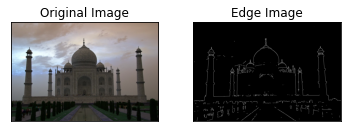

In [ ]:
img = cv2.imread(os.path.join(os.path.dirname(notebook_path),'software/Flickr15K/images/Taj_Mahal/1024263.jpg'))
# img=cv2.resize(img,(224,224))
edges = cv2.Canny(img,150,200)
# edges=cv2.resize(edges,(224,224))
edges = cv2.cvtColor(edges,cv2.COLOR_GRAY2RGB)
# Plotting
plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

## Feature extraction using Inception

In [ ]:
from os import listdir
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input, Subtract, Lambda
from pickle import dump
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
import numpy as np

def extract_features(directory):
  model = InceptionV3()
  model = Model(inputs=model.inputs, outputs=model.layers[-3].output)
  print(model.summary())
  features=dict()
  count=0
  res=[]
  
  for name in imageName:
    count+=1
    filename = directory + '/' + name
    image = cv2.imread(filename)
    
    image = cv2.Canny(image,150,200)
    image = cv2.resize(image, (299,299))
    image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    image = np.array(image)

   
    image = image.reshape((1,image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image, verbose=0)
    image_id = name.split('.')[0]
    features[image_id] = feature
    if count%100==0:
      print('>%s' % name)
    
  return features


directory = os.path.join(os.path.dirname(notebook_path),'Flickr15K/images')
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
dump(features, open(os.path.join(os.path.dirname(notebook_path),'InceptionV3.pkl'), 'wb'))

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

KeyboardInterrupt: ignored

In [ ]:
features

## Loading Feature vectors

In [ ]:
import pickle
file=open(os.path.join(os.path.dirname(notebook_path),'/software/InceptionV3.pkl'),'rb')
feature_real=pickle.load(file)
file.close()

file=open(os.path.join(os.path.dirname(notebook_path),'/software/sketch_features/InceptionV3.pkl'),'rb')
feature_sketch=pickle.load(file)
file.close()

In [ ]:
import numpy as np
np.shape(feature_real['airplane/104249'][0])

(7, 7, 2048)

only for inceptionV3 and resNet

In [ ]:
x,y,z=np.shape(feature_real['airplane/104249'][0])
for filename,arr in feature_real.items():
  # print(np.shape(arr[0]))
  tmp=arr[0].reshape((x*y*z))
  tmp=np.reshape(tmp,(-1,len(tmp)))
  feature_real[filename]=tmp

In [ ]:
for filename,arr in feature_sketch.items():
  # print(np.shape(arr[0]))
  tmp=arr[0].reshape((x*y*z))
  tmp=np.reshape(tmp,(-1,len(tmp)))
  feature_sketch[filename]=tmp

In [ ]:
np.shape(feature_real['airplane/104249'])

(1, 100352)



##Cosine similarity ranking

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def findRanking(feature_real,query):
  ranking=[]
  v2=query 
  # v2=np.reshape(query,(-1,len(query)))  
  # print(np.shape(v2))
  for filename in feature_real:
    v1=feature_real[filename] 
    # v1=np.reshape(feature_real[filename],(-1,len(feature_real[filename]))) 
    
    ranking.append([filename,cosine_similarity(v1,v2)])
  
  ranking=sorted(ranking, key=lambda x: x[1], reverse = True)
  return ranking

checking ranking for test

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['concatenate', 'add', 'dot', 'maximum', 'minimum', 'shuffle', 'multiply', 'average', 'subtract']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


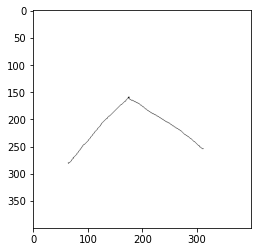

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(os.path.join(os.path.dirname(notebook_path),"/software/Flickr15K/sketches/1/3.png"))
imgplot = plt.imshow(img)
plt.show()

In [ ]:
ranking=findRanking(feature_real,feature_sketch['1/24'])

In [1]:
# ranking=ranking_vgg['1/3']

Populating the interactive namespace from numpy and matplotlib


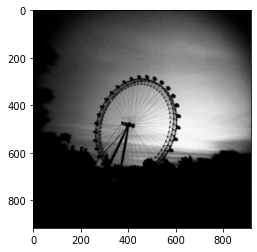

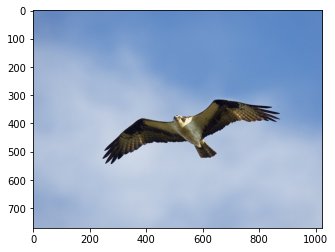

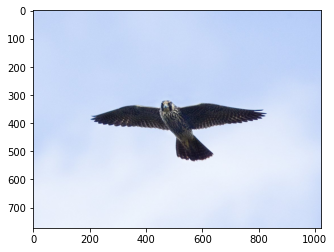

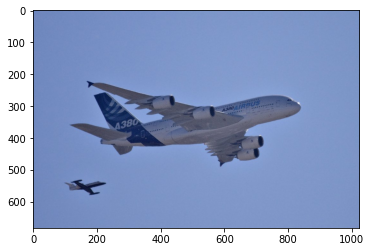

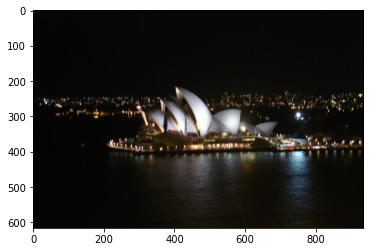

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(5):
  img = mpimg.imread(os.path.join(os.path.dirname(notebook_path),"/software/Flickr15K/images/"+ranking[i][0]+".jpg"))
  imgplot = plt.imshow(img)
  plt.show()

generating ranking for every query

In [ ]:
result={}
count=0
for filename in feature_sketch:
  count+=1
  result[filename]=findRanking(feature_real,feature_sketch[filename])
  if count%10==0:
    print(filename," ",count)

1/10   10
1/20   20
1/30   30
2/7   40
2/17   50
2/27   60
3/4   70
3/14   80
3/24   90
4/1   100
4/11   110
4/21   120
4/31   130
5/8   140
5/18   150
5/28   160
6/5   170
6/15   180
6/25   190
7/2   200
7/12   210
7/22   220
7/32   230
8/9   240
8/19   250
8/29   260
9/6   270
9/16   280
9/26   290
10/3   300
10/13   310
10/23   320
10/33   330


###Storing ground truth on single dict


In [ ]:
real_relevant_image = {}
for i in range(1, 34):
  real_relevant_image[i] = []
file = open(os.path.join(os.path.dirname(notebook_path),"/software/Flickr15K/list_images.txt"), "r")
title_list = []
for line in file.readlines():
    line = line.strip('\n').split(" ")
    number = int(line[0])
    name = line[1].split("/")[0]
    if name not in real_relevant_image[number]:
      real_relevant_image[number].append(name)
file.close()

In [ ]:
real_relevant_image[20]

['heart_shape']

Loading Ranking which was dumped before

In [ ]:
import pickle
file=open(os.path.join(os.path.dirname(notebook_path),'/software/InceptionList.pkl'),'rb')
ranking_resnet=pickle.load(file)
file.close()


# SBIR MAP





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
real_relevant_image = {}
title_list = {}
for i in range(1, 34):
  real_relevant_image[i] = []
  title_list[i] = []
file = open(os.path.join(os.path.dirname(notebook_path),"/software/Flickr15K/list_images.txt"), "r")

for line in file.readlines():
    line = line.strip('\n').split(" ")
    number = int(line[0])
    name = line[1].split(".")[0]
    if name not in real_relevant_image[number]:
      real_relevant_image[number].append(name)
    if name.split('/')[0] not in title_list[number]:
      title_list[number].append(name.split('/')[0])
file.close()

In [ ]:
sketch_relevent = {}
for i in range(1, 34):
  sketch_relevent[i] = 0
file = open(os.path.join(os.path.dirname(notebook_path),"/software/Flickr15K/list_images.txt"), "r")
title_list = []
for line in file.readlines():
    line = line.strip('\n').split(" ")
    number = int(line[0])
    name = line[1].split("/")[0]
    sketch_relevent[number]+=1
file.close()

In [ ]:
real_relevant_image[1]

['fire_balloon/110181',
 'fire_balloon/129097',
 'fire_balloon/13794',
 'fire_balloon/138163',
 'fire_balloon/142476',
 'fire_balloon/142850',
 'fire_balloon/142984',
 'fire_balloon/143028',
 'fire_balloon/356485',
 'fire_balloon/356488',
 'fire_balloon/356491',
 'fire_balloon/356498',
 'fire_balloon/356557',
 'fire_balloon/366639',
 'fire_balloon/384541',
 'fire_balloon/390060',
 'fire_balloon/551831',
 'fire_balloon/551835',
 'fire_balloon/566962',
 'fire_balloon/60385',
 'fire_balloon/60388',
 'fire_balloon/73852',
 'fire_balloon/73863',
 'fire_balloon/81386',
 'fire_balloon/81393',
 'fire_balloon/90415',
 'fire_balloon/917248',
 'fire_balloon/917249',
 'fire_balloon/917254',
 'fire_balloon/947521',
 'fire_balloon/96346',
 'fire_balloon/96384',
 'fire_balloon/96539',
 'fire_balloon/97479',
 'fire_balloon/99016',
 'fire_balloon/990953',
 'London_eye/1001395',
 'London_eye/100246',
 'London_eye/1004885',
 'London_eye/1006701',
 'London_eye/1006751',
 'London_eye/1006928',
 'London_eye

In [ ]:
len(real_relevant_image[1])

1306

In [ ]:
def mean_average_prescision(actual,ranking):
  precision=[]
  recall=[]
  count=0;
  n=len(actual)
  for i in range(len(ranking)):
    
    arr=ranking[i][0].split('.')
    
    if arr[0] in actual:
      count+=1
      recall.append(count/n)
      precision.append(count/(i+1))
      # recall[count/n]=count/(i+1)
      # print(count,i)
    
  return (recall,precision)
  


In [ ]:
def average_precison(recall,precision):
  n=len(recall)
  j=0;
  p={}
  average_precison=0
  for i in range(10):
    for k in range(n):
      if(((i+1)*10)>(recall[k]*100)):
        continue
      else:
        # print(recall[k]*100)
        p[(i+1)*10]=precision[k]*100
        average_precison+=(precision[k]*100)
        break
  average_precison/=10
  return average_precison


In [ ]:
def R_Precision(actual,ranking):
  r=0
  R=len(actual)
  for i in range(R):
    arr=ranking[i][0].split('.')
    
    if arr[0] in actual:
      r+=1
  r/=R
  return r

## InceptionV3

In [ ]:
import pickle
file=open(os.path.join(os.path.dirname(notebook_path),'/software/InceptionList.pkl'),'rb')
ranking=pickle.load(file)
file.close()

In [ ]:
maverage_precison=0
for filename,value in ranking_vgg16.items():
  index=filename.split('/')
  recall,precision=mean_average_prescision(sketch_ground_truth[int(index[1])],value)
  maverage_precison+=average_precison(recall,precision)
  # print(recall)
  # break
  # c+=1
maverage_precison/=len(ranking)
print("Maverage_precison = "+str(maverage_precison))

MAP = 31.65413414062314
